In [33]:
import log_analyzer as lo_an
import math
import statistics
import os
import pandas as pd
import seaborn as sns
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
logs_service = pd.read_csv("service_clus_fulleval.csv")
logs_clus_02 = pd.read_csv("kw_tree_02clus_clus_fulleval.csv")
logs_noclus = pd.read_csv("kw_tree_noclus_clus_fulleval.csv")


In [3]:
log_analyzer_service=lo_an.Log_Analyzer(logs_service)
results_service=log_analyzer_service.run_it()
log_analyzer_clus_02=lo_an.Log_Analyzer(logs_clus_02)
results_02=log_analyzer_clus_02.run_it()
log_analyzer_noclus=lo_an.Log_Analyzer(logs_noclus)
results_noclus=log_analyzer_noclus.run_it()


In [4]:
print("Service:")
print(results_service[3])
print("KW No Cluster:")
print(results_noclus[3])
print("KW eps=0.2:")
print(results_02[3])

Service:
{'Mean Turns': 3.4430894308943087, 'Mean nResults Reduct': 0.36422785733138763, 'Harmonic mean nResult Reduct': 0, 'Mean delta nResults': 8.390226972999237, 'Mean delta Rank': 0.7329770250572638, 'Median Turns': 3.0, 'Max Turns needed': 31}
KW No Cluster:
{'Mean Turns': 2.578195181706819, 'Mean nResults Reduct': 0.45164054650634033, 'Harmonic mean nResult Reduct': 0, 'Mean delta nResults': 8.993766233766234, 'Mean delta Rank': 0.7962152133580706, 'Median Turns': 2.0, 'Max Turns needed': 22}
KW eps=0.2:
{'Mean Turns': 2.537158023683136, 'Mean nResults Reduct': 0.45559101971760796, 'Harmonic mean nResult Reduct': 0, 'Mean delta nResults': 9.134912849920772, 'Mean delta Rank': 0.8131743756130687, 'Median Turns': 2.0, 'Max Turns needed': 16}


In [40]:
results_noclus[4].sort_values

,dialogId,name,turns
0,3,Anmeldung einer Wohnung,5
1,4,Kinderreisepass beantragen / verlängern / aktu...,1
2,4,Änderung/Wechsel der Hauptwohnung,1
3,7,Reisepass beantragen,5
4,9,Schwerbehinderung - Feststellungsverfahren,4
...,...,...,...
4893,13299,Meldebescheinigung beantragen,1
4894,13303,Reisepass für in Berlin nicht gemeldete Person...,4
4895,13307,Beseitigung von Straßenschäden an Autobahnen s...,1
4896,13313,Fahrerlaubnis - Umtausch eines alten Führersch...,1


In [16]:
print("Service:")
print(results_service[4])
print("KW No Cluster:")
print(results_noclus[4])
print("KW eps=0.2:")
print(results_02[4])

Service:
      dialogId                                               name  turns
0            3                            Anmeldung einer Wohnung      9
1            4                            Anmeldung einer Wohnung      0
2            4                  Änderung/Wechsel der Hauptwohnung      2
3            7                               Reisepass beantragen      5
4            9         Schwerbehinderung - Feststellungsverfahren      4
...        ...                                                ...    ...
3931     13285                         Personalausweis beantragen      3
3932     13295  Belehrung nach dem Infektionsschutzgesetz - Be...      0
3933     13295                  Änderung/Wechsel der Hauptwohnung      9
3934     13303  Reisepass für in Berlin nicht gemeldete Person...      3
3935     13313  Fahrerlaubnis - Umtausch eines alten Führersch...      1

[3936 rows x 3 columns]
KW No Cluster:
      dialogId                                               name  turns
0 

In [17]:
df=results_service[4].copy()
df["Algorithm"]="Service Clustering"
df_1=results_noclus[4].copy()
df_1["Algorithm"]="KW Check"
df_2=results_02[4].copy()
df_2["Algorithm"]="KW Check + Cluster"
df_tot=[df,df_1,df_2]
result_tot=pd.concat(df_tot)

In [19]:
result_tot

,dialogId,name,turns,Algorithm
0,3,Anmeldung einer Wohnung,9,Service Clustering
1,4,Anmeldung einer Wohnung,0,Service Clustering
2,4,Änderung/Wechsel der Hauptwohnung,2,Service Clustering
3,7,Reisepass beantragen,5,Service Clustering
4,9,Schwerbehinderung - Feststellungsverfahren,4,Service Clustering
...,...,...,...,...
4893,13299,Meldebescheinigung beantragen,1,KW Check + Cluster
4894,13303,Reisepass für in Berlin nicht gemeldete Person...,4,KW Check + Cluster
4895,13307,Beseitigung von Straßenschäden an Autobahnen s...,1,KW Check + Cluster
4896,13313,Fahrerlaubnis - Umtausch eines alten Führersch...,1,KW Check + Cluster


<AxesSubplot:xlabel='turns', ylabel='Density'>

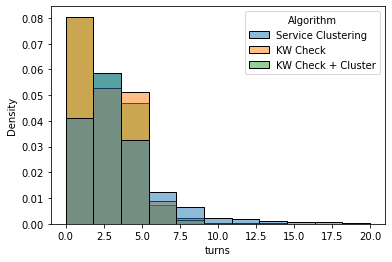

In [20]:
sns.histplot(data=result_tot,hue="Algorithm",x="turns",stat="density",common_norm=True,bins=11,binrange=(0,20))

<AxesSubplot:xlabel='turns', ylabel='Probability'>

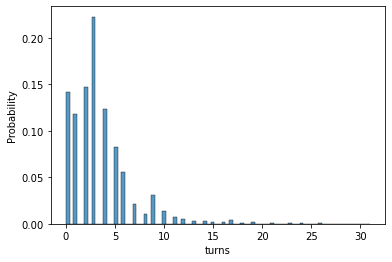

In [21]:
sns.histplot(data=results_service[4],x="turns",stat="probability")

<AxesSubplot:xlabel='turns', ylabel='Probability'>

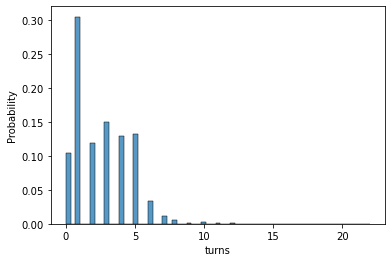

In [22]:
sns.histplot(data=results_noclus[4],x="turns",stat="probability")

<AxesSubplot:xlabel='turns', ylabel='Probability'>

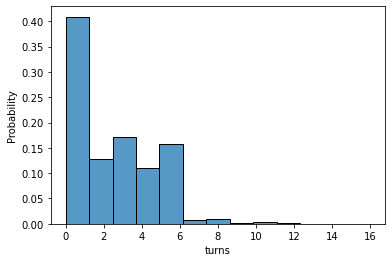

In [23]:
sns.histplot(data=results_02[4],x="turns",stat="probability",bins=13)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='turns', ylabel='Density'>

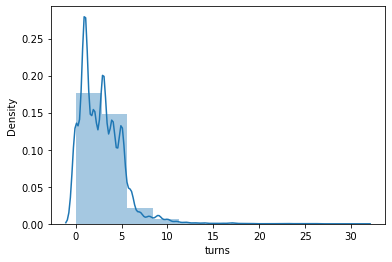

In [24]:
sns.distplot(result_tot["turns"],bins=11)

In [38]:
ax=sns.violinplot(x="Algorithm", y="turns", data=result_tot)
#fig = ax.get_figure()
plt.savefig('violin.png')

RuntimeError: No suitable pdf to png renderer found.

RuntimeError: No suitable pdf to png renderer found.

<Figure size 432x288 with 1 Axes>

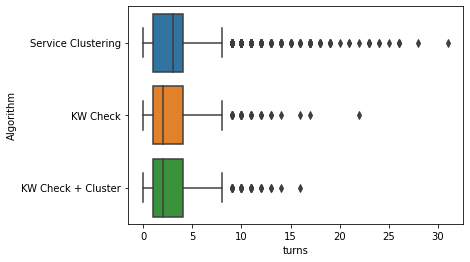

In [61]:
ax = sns.boxplot(x="turns", y="Algorithm", data=result_tot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

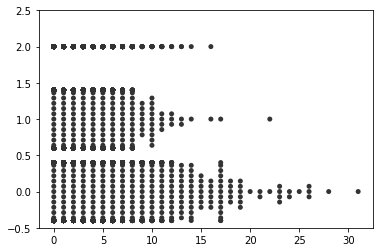

In [62]:
ax = sns.swarmplot(x="turns", y="Algorithm", data=result_tot, color=".2")
ax = sns.boxplot(x="turns", y="Algorithm", data=result_tot)